In [19]:
import pickle
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import Conv2D
from keras.layers import Dense, Activation, Flatten, Input, Dropout
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

In [20]:
def loadData():
    file = open('/content/drive/MyDrive/Colab Notebooks/vn_currency.data', 'rb')
    (images, labels) = pickle.load(file)
    file.close()
    print(images.shape)
    print(labels.shape)
    return images, labels

In [21]:
X,y = loadData()
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=100)

(2979, 128, 128, 3)
(2979, 11)


In [25]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(128, 128, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2048, activation='relu'))
model.add(Dense(11, activation='softmax'))

In [26]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.1,
    rescale=1./255,
	width_shift_range=0.1,
    height_shift_range=0.1,
	horizontal_flip=True,
    brightness_range=[0.2,1.5], fill_mode="nearest")

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [27]:
history = model.fit(aug.flow(X_train, y_train, batch_size=64),epochs=20, validation_data=aug.flow(X_test,y_test,batch_size=64), verbose=1)

Epoch 1/20
38/38 [==============================] - 39s 958ms/step - loss: 5.0165 - accuracy: 0.1947 - val_loss: 1.9803 - val_accuracy: 0.2752
Epoch 2/20
38/38 [==============================] - 13s 344ms/step - loss: 1.8546 - accuracy: 0.3416 - val_loss: 1.6987 - val_accuracy: 0.3926
Epoch 3/20
38/38 [==============================] - 13s 341ms/step - loss: 1.5466 - accuracy: 0.4494 - val_loss: 1.2752 - val_accuracy: 0.5604
Epoch 4/20
38/38 [==============================] - 13s 345ms/step - loss: 1.2378 - accuracy: 0.5472 - val_loss: 1.3531 - val_accuracy: 0.5268
Epoch 5/20
38/38 [==============================] - 13s 342ms/step - loss: 1.1162 - accuracy: 0.5917 - val_loss: 0.9460 - val_accuracy: 0.6560
Epoch 6/20
38/38 [==============================] - 13s 344ms/step - loss: 0.9931 - accuracy: 0.6358 - val_loss: 1.0013 - val_accuracy: 0.6577
Epoch 7/20
38/38 [==============================] - 13s 345ms/step - loss: 0.9996 - accuracy: 0.6517 - val_loss: 1.1715 - val_accuracy: 0.5789

In [28]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss: %.4f'% score[0])
print('Test accuracy %.4f'% score[1])

Test loss: 48.4838
Test accuracy 0.7617


In [29]:
model.save('Final.h5')

In [30]:
from keras.models import load_model
model5=load_model('Final.h5')

In [31]:
import cv2 as cv
from keras.preprocessing.image import load_img, img_to_array
import numpy as np

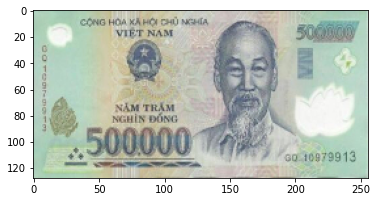

In [33]:
img = load_img('/content/500k.jpg',target_size=(128,256))
plt.imshow(img)
img = img_to_array(img)

In [34]:
img = cv.resize(img, dsize=(128, 128))
img = img.astype('float')*1./255
# Convert to tensor
img = np.expand_dims(img, axis=0)

In [35]:
class_name = ['200d','500d','1000d','2000d','5000d','10000d','20000d','50000d','100000d','200000d','500000d']

In [38]:
model_5 = load_model('Final.h5')
predict = model_5.predict(img)
class_name[np.argmax(predict[0])], (predict[0])

('500000d', array([1.9773085e-12, 1.8673074e-15, 6.8178289e-12, 7.0555634e-15,
        2.2616690e-13, 1.5324644e-11, 7.8048522e-04, 1.3359074e-04,
        1.2696074e-11, 6.2507763e-11, 9.9908590e-01], dtype=float32))